In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv(r"C:\Users\Jyoti\Downloads\Customer churn Analysis\Telecom Customers Churn.csv",encoding= 'unicode_escape' )

In [42]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Replacing Blanks with 0 as Tenure is 0 and Total charges is not recorded.

# Converted Totalcharges data type from object to Float

In [12]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Finding null values

In [64]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

0

In [65]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

# converted 0 and 1 Senior citizen value to yes/No for basic understanding 

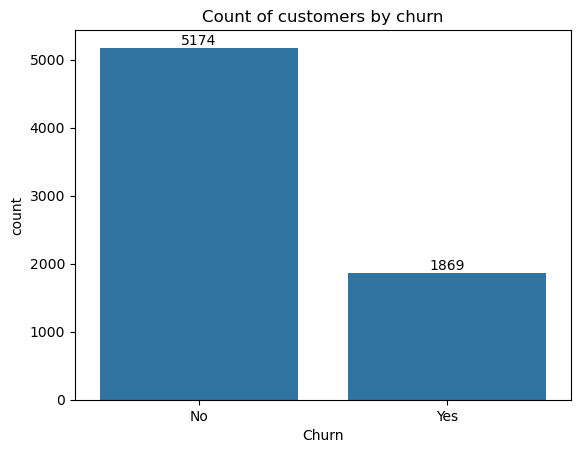

In [43]:
ax=sns.countplot(x ='Churn', data = df)

plt.title("Count of customers by churn")
ax.bar_label(ax.containers[0])
plt.show()

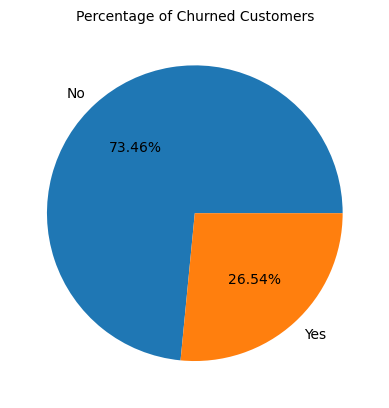

In [31]:
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

# From the above pie chart we see that 26.54% customers habe churned out

# Let's Explore the reason behind it 

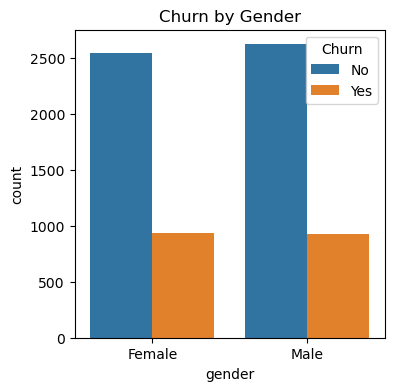

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x ='gender', data = df, hue="Churn")
plt.title("Churn by Gender")
plt.show()


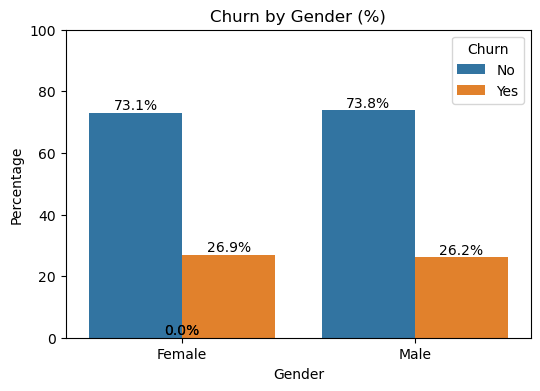

In [66]:
# Calculate counts for each combination of gender and Churn
count_data = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Calculate percentage
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Reset index for plotting
percent_data = percent_data.reset_index().melt(id_vars='gender', value_name='percentage', var_name='Churn')

# Plotting
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(data=percent_data, x='gender', y='percentage', hue='Churn')

# Adding percentage labels on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f"{height:.1f}%", (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom')

plt.title("Churn by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.show()

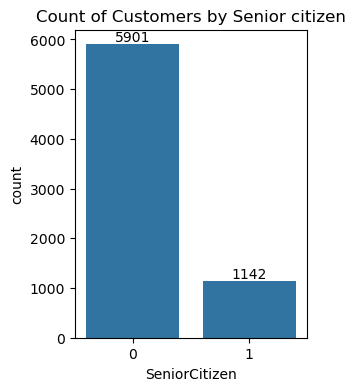

In [58]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x ="SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior citizen")
plt.show()

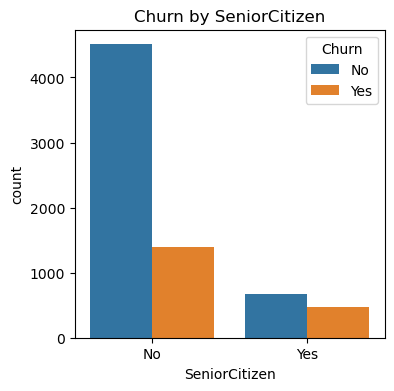

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(x ='SeniorCitizen', data = df, hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\3280702958.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percent_data.iloc[i].cumsum()[j] - percent_data.iloc[i][j] / 2,
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\3280702958.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percent_data.iloc[i][j]:.1f}%",


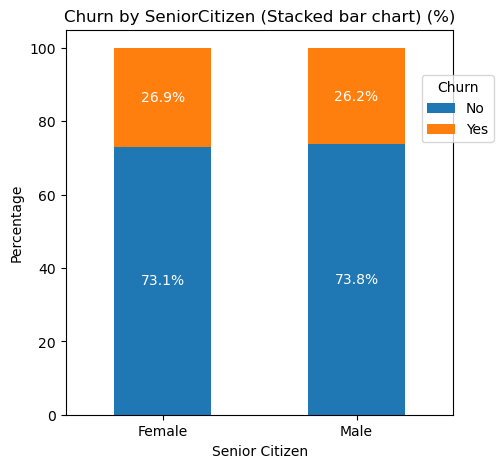

In [67]:
# Calculate percentage
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
percent_data.plot(kind='bar', stacked=True, figsize=(5, 5))

# Adding percentage labels on top of the bars
for i in range(len(percent_data)):
    for j in range(len(percent_data.columns)):
        plt.text(i, percent_data.iloc[i].cumsum()[j] - percent_data.iloc[i][j] / 2,
                 f"{percent_data.iloc[i][j]:.1f}%",
                 ha='center', va='center', color='white', fontsize=10)

plt.title("Churn by SeniorCitizen (Stacked bar chart) (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(.9,.9))
plt.show()


# Comparative a greater percentage of people in senior citizen category have churned 

In [69]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

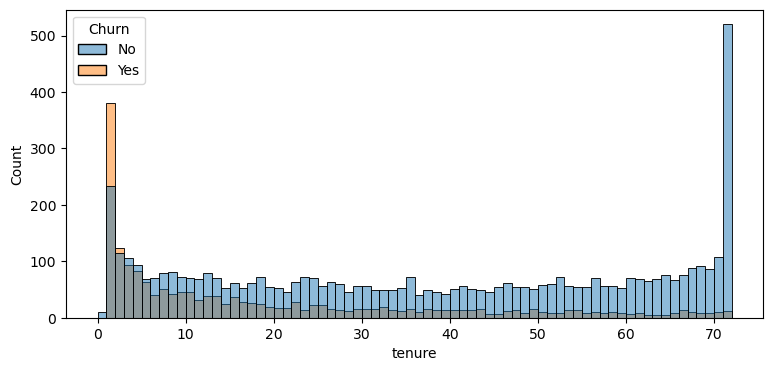

In [74]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

# people who used our services for a long time have stayed and 
 # people who used our services for #1 or 2 months have churned out 

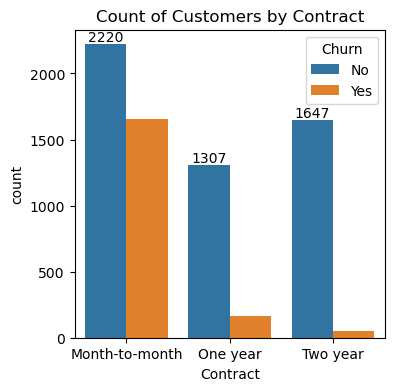

In [77]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x ="Contract", data = df,hue)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# People who have month to month contract are likely to churn then those from who have 1 or 2 years of contract 

In [91]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\149378275.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),  fontsize=9)  # Decrease x-tick label font size
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\149378275.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=9)  # Decrease y-tick label font size
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\149378275.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),  fontsize=9)  # Decrease x-tick label font size
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_9204\149378275.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

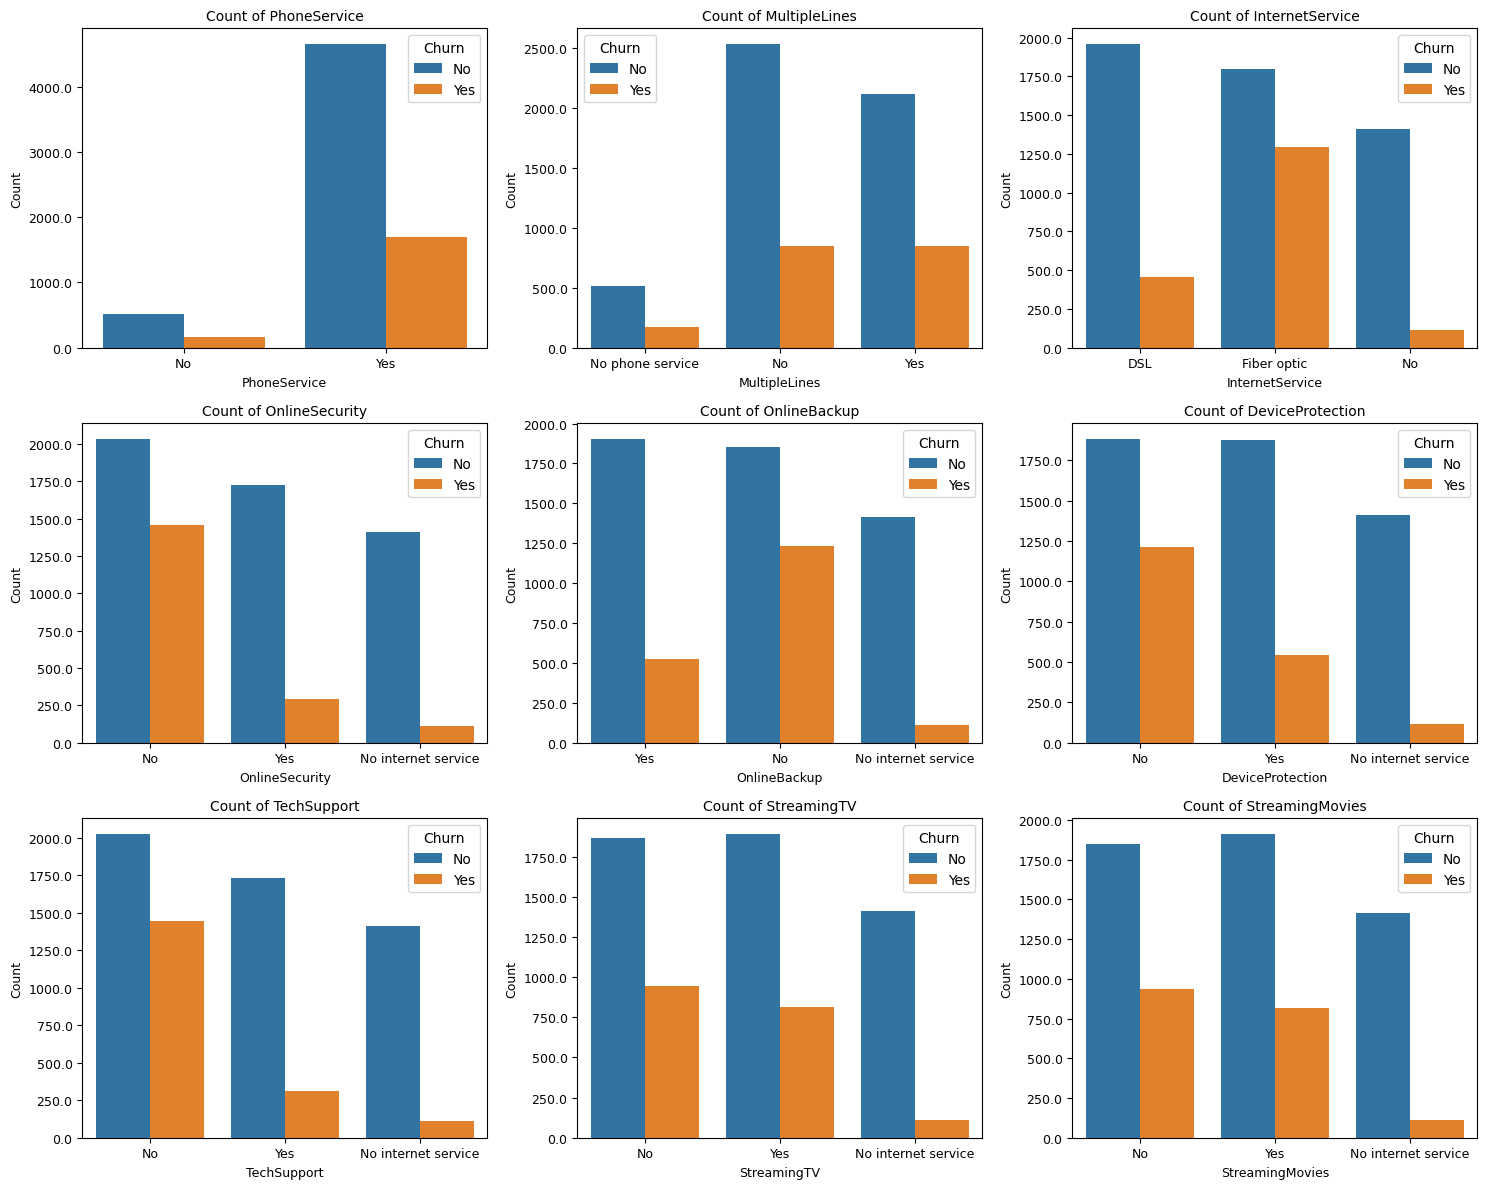

In [97]:
# Set up the subplot grid
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns + 2) // 3, ncols=3, figsize=(15, 4 * ((num_columns + 2) // 3)))
axes = axes.flatten()  # Flatten to easily iterate

# Create a countplot for each column
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(x=column, data=df, ax=ax,hue="Churn")
    ax.set_title(f'Count of {column}', fontsize=10)  # Decrease title font size
    ax.set_ylabel('Count', fontsize=9)  # Decrease y-axis label font size
    ax.set_xlabel(column, fontsize=9)  # Decrease x-axis label font size
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=9)  # Decrease x-tick label font size
    ax.set_yticklabels(ax.get_yticks(), fontsize=9)  # Decrease y-tick label font size
    # Hide any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# The data visualizations reveal that customers who lack additional services such as phone service, online security, or tech support are more likely to churn. Fiber optic internet users show less churn compared to DSL users. Similarly, the absence of streaming services (TV or movies) correlates with higher churn, highlighting that value-added services can play a crucial role in customer retention.

In [99]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

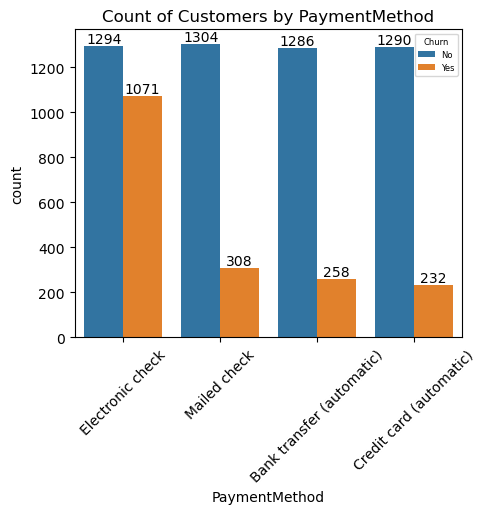

In [110]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x ='PaymentMethod', data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.legend(title='Churn',title_fontsize=6,fontsize=6)
plt.title("Count of Customers by PaymentMethod")
plt.show()

# Customer is likely to churn when he is using electronic check as payment method 